<a href="https://colab.research.google.com/github/naveenmk404/INN_Lab/blob/main/program5_INN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

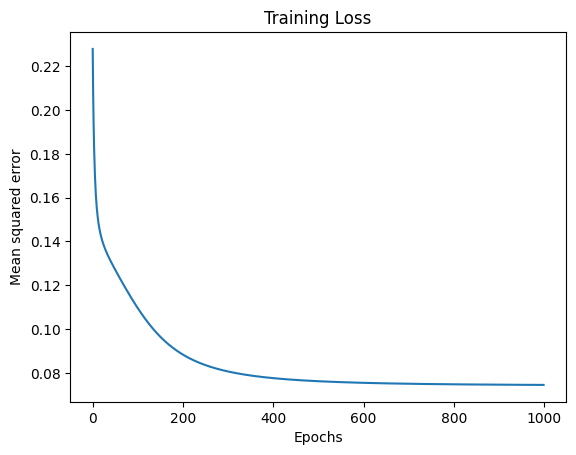

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size=input_size
        self.output_size=output_size
        self.hidden_size=hidden_size

        self.weights_input_hidden=np.random.rand(self.hidden_size,self.input_size)
        self.bias_hidden=np.zeros(((self.hidden_size,1)))
        self.weights_hidden_output = np.random.rand(self.output_size,self.hidden_size)

        self.bias_output=np.zeros((self.output_size,1))

        self.learning_rate=0.01

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))

    def sigmoid_derivative(self,x):
        return x* (1-x)

    def train(self,inputs,targets,epochs):
        losses=[]

        for epoch in range(epochs):
            hidden_inputs=np.dot(self.weights_input_hidden,inputs)+self.bias_hidden
            hidden_outputs=self.sigmoid(hidden_inputs)

            final_inputs = np.dot(self.weights_hidden_output,hidden_outputs)+self.bias_output
            final_outputs = self.sigmoid(final_inputs)

            error = targets-final_outputs
            losses.append(np.mean(error**2))

            output_errors=error * self.sigmoid_derivative(final_outputs)
            hidden_errors=np.dot(self.weights_hidden_output.T,output_errors) * self.sigmoid_derivative(hidden_outputs)

            self.weights_hidden_output+= self.learning_rate * np.dot(output_errors,hidden_outputs.T)
            self.bias_output+=self.learning_rate * np.sum(output_errors,axis=1,keepdims=True)

            self.weights_input_hidden+=self.learning_rate * np.dot(hidden_errors,inputs.T)
            self.bias_hidden +=self.learning_rate * np.sum(hidden_errors,axis=1, keepdims=True)

        return losses

    def predict(self,inputs):
        hidden_inputs = np.dot(self.weights_input_hidden,inputs)+self.bias_hidden
        hidden_outputs = self.sigmoid(hidden_inputs)
        final_inputs=np.dot(self.weights_hidden_output,hidden_outputs)+self.bias_output
        final_outputs=self.sigmoid(final_inputs)

        return final_outputs

np.random.seed(42)
X = np.random.rand(2,100)
y=(X[0,:]+X[1,:]).reshape(1,-1)

X=(X-np.mean(X))/np.std(X)
Y=(y-np.mean(y)/np.std(y))

input_size=X.shape[0]
hidden_size=4
output_size=1

nn=NeuralNetwork(input_size,hidden_size,output_size)
losses=nn.train(X,y,epochs=1000)


plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.show()
